In [34]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from math import sqrt
import copy
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy


In [35]:
import sklearn
print(sklearn.__version__)

0.19.1


In [36]:
import iaml01cw2_helpers
Xtrn,Ytrn,Xtst,Ytst = iaml01cw2_helpers.load_CoVoST2("data")

In [37]:
# Question 3.1
kmeans = KMeans(n_clusters=22, random_state=1).fit(Xtrn)
# sum of squared distances of samples to their closest cluster centre 
print(kmeans.inertia_) 
# number of samples for each cluster
ClusterArray = [0,0,0,0,0,
                0,0,0,0,0,
                0,0,0,0,0,
                0,0,0,0,0,
                0,0]
for i in range(22000):
    index = kmeans.labels_[i]
    ClusterArray[index] +=1
print(ClusterArray)

38185.816951386696
[1018, 1125, 1191, 890, 1162, 1332, 839, 623, 1400, 838, 659, 1276, 121, 152, 950, 1971, 1251, 845, 896, 930, 1065, 1466]


In [38]:
# Question 3.2
arrayCollection = [[],[],[],[],[],
                   [],[],[],[],[],
                   [],[],[],[],[],
                   [],[],[],[],[],
                   [],[]]
arrayIndex = [[],[],[],[],[],
              [],[],[],[],[],
              [],[],[],[],[],
              [],[],[],[],[],
              [],[]]

for i in range(22000):
    index = Ytrn[i]
    arrayIndex[index].append(i)
    arrayCollection[index].append(Xtrn[i])




In [39]:
# Question 3.2
mean_array = []
for i in range(22):
    mean_array.append(np.mean(arrayCollection[i],0))

In [40]:
# print(len(arrayIndex[1]))
# print(len(arrayCollection[2]))

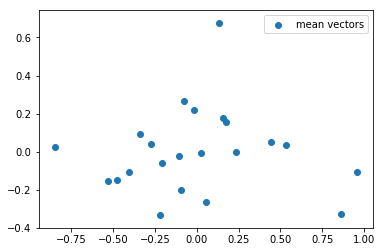

In [41]:
# Question 3.2
pca = PCA(n_components = 2)  
twoD_Xtrn_nm = pca.fit_transform(mean_array)
class_array_X_mean = (twoD_Xtrn_nm[:,0])
class_array_Y_mean = (twoD_Xtrn_nm[:,1])
plt.scatter(class_array_X_mean,class_array_Y_mean,label="mean vectors")
plt.legend()

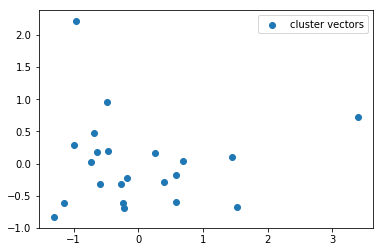

In [43]:
# Question 3.2
pca = PCA(n_components = 2)
twoD_Xtrn_nm = pca.fit_transform(kmeans.cluster_centers_)
class_array_X_cluster = twoD_Xtrn_nm[:,0]
class_array_Y_cluster = twoD_Xtrn_nm[:,1]
plt.scatter(class_array_X_cluster,class_array_Y_cluster,label="cluster vectors")
plt.legend()

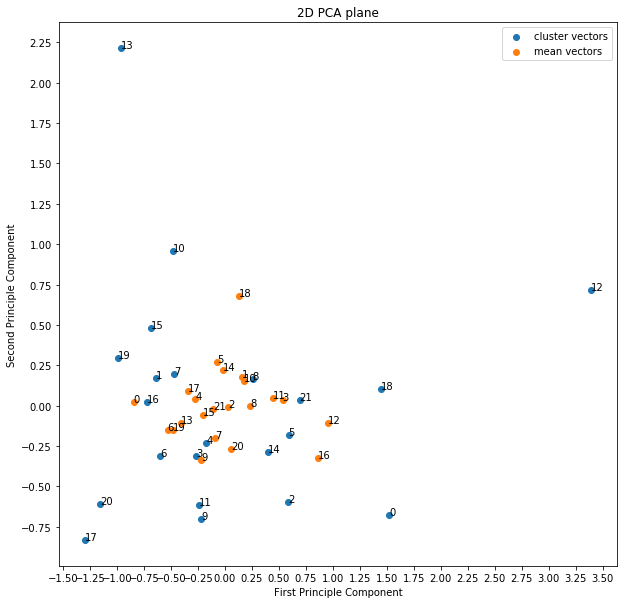

In [44]:
# Question 3.2
plt.figure(figsize=(10,10))
plt.scatter(class_array_X_cluster,class_array_Y_cluster,label="cluster vectors")
plt.scatter(class_array_X_mean,class_array_Y_mean,label="mean vectors")
plt.xlabel("First Principle Component")
plt.ylabel("Second Principle Component")
plt.title("2D PCA plane")
x_major_locator=MultipleLocator(0.25)
y_major_locator=MultipleLocator(0.25)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

for i in range(22):
    ax.text(class_array_X_cluster[i],class_array_Y_cluster[i],str(i))
    ax.text(class_array_X_mean[i],class_array_Y_mean[i],str(i))
plt.legend()

In [5]:
# %%html
# <style>
# .output_wrapper, .output {
#     height:auto !important;
#     max-height:300px;  /* your desired max-height here */
# }
# .output_scroll {
#     box-shadow:none !important;
#     webkit-box-shadow:none !important;
# }
# </style>

22
26


Text(0,0.5,'Language')

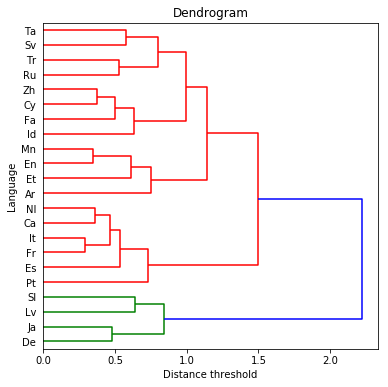

In [45]:
# Question 3.3
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

mean_array = []
for i in range(22):
    mean_array.append(np.mean(arrayCollection[i],0))
    
language_array = ["Ar","Ca","Cy","De","En",
                  "Es","Et","Fa","Fr","Id",
                  "It","Ja","Lv","Mn","Nl",
                  "Ru","Sl","Sv","Pt","Ta",
                  "Tr","Zh"] 
print(len(mean_array))
print(len(mean_array[0]))
plt.figure(figsize=(6,6))
Z = hierarchy.linkage(mean_array,method="ward")    
dn = hierarchy.dendrogram(Z,orientation="right",labels = language_array)
plt.title("Dendrogram")
plt.xlabel("Distance threshold")
plt.ylabel("Language")
# plt.text(mean_array,language_array)

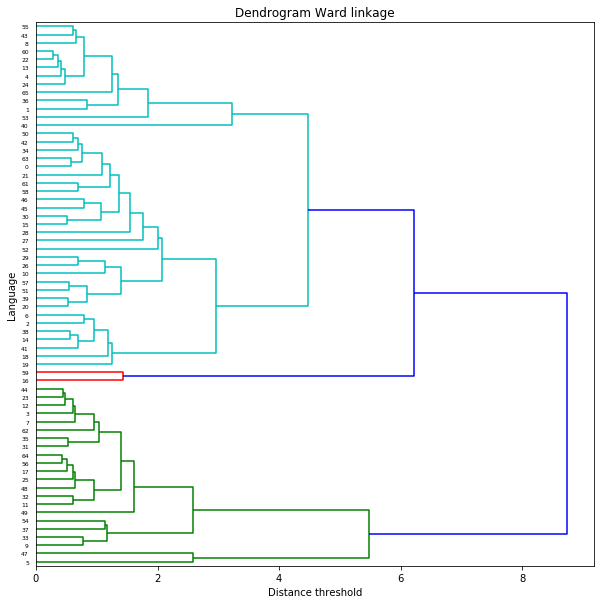

In [46]:
# 3.4
import iaml01cw2_helpers
Xtrn,Ytrn,Xtst,Ytst = iaml01cw2_helpers.load_CoVoST2("data")
arrayCollection = [[],[],[],[],[],
                   [],[],[],[],[],
                   [],[],[],[],[],
                   [],[],[],[],[],
                   [],[]]
for i in range(22000):
    index = Ytrn[i]
    arrayCollection[index].append(Xtrn[i])
    
array = []
for i in range(22):
    kmeans = KMeans(n_clusters=3, random_state=1).fit(arrayCollection[i])
    for j in range(3):
        array.append(kmeans.cluster_centers_[j])
plt.figure(figsize=(10,10))
plt.title("Dendrogram Ward linkage")
plt.xlabel("Distance threshold")
plt.ylabel("Language")
Z = hierarchy.linkage(array,method="ward")    
dn = hierarchy.dendrogram(Z,orientation="right")

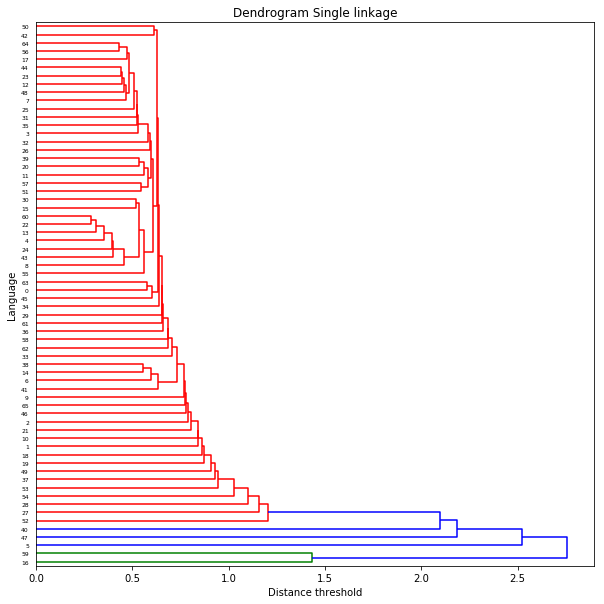

In [48]:
# 3.4
plt.figure(figsize=(10,10))   
plt.title("Dendrogram Single linkage")
plt.xlabel("Distance threshold")
plt.ylabel("Language")
Z = hierarchy.linkage(array,method="single")    
dn = hierarchy.dendrogram(Z,orientation="right")

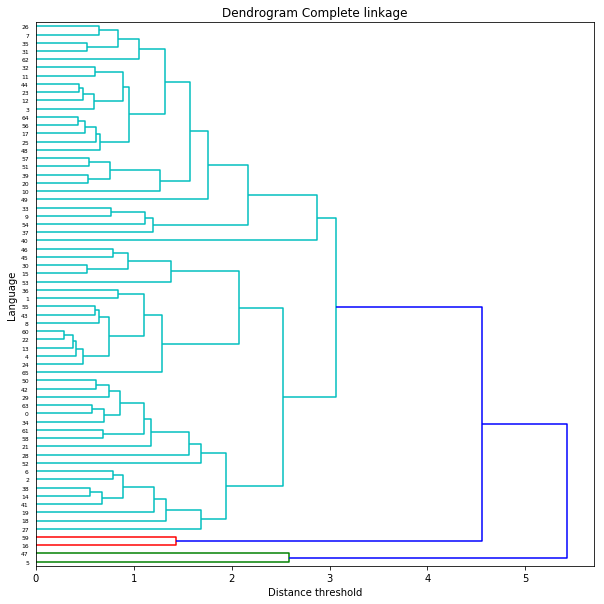

In [47]:
# 3.4
plt.figure(figsize=(10,10))   
plt.title("Dendrogram Complete linkage")
plt.xlabel("Distance threshold")
plt.ylabel("Language")
Z = hierarchy.linkage(array,method="complete")    
dn = hierarchy.dendrogram(Z,orientation="right")

In [49]:
# 3.5 
import iaml01cw2_helpers
import numpy as np
from sklearn import mixture
Xtrn,Ytrn,Xtst,Ytst = iaml01cw2_helpers.load_CoVoST2("data")

class_0_trn = []
for i in range(22000):
    if Ytrn[i] == 0:
        class_0_trn.append(Xtrn[i])

class_0_tst = []
for i in range(2200):
    if Ytst[i] == 0:
        class_0_tst.append(Xtst[i])

K = [1,3,5,10,15]


diag_array_training = []
for k in K:
    g = mixture.GaussianMixture(n_components=k,covariance_type='diag')        
    g.fit(class_0_trn)        
    diag_array_training.append(g.score(class_0_trn))
    
diag_array_testing = []
for k in K:
    g = mixture.GaussianMixture(n_components=k,covariance_type='diag')        
    g.fit(class_0_trn)        
    diag_array_testing.append(g.score(class_0_tst))
        
full_array_training = []
for k in K:
    g = mixture.GaussianMixture(n_components=k,covariance_type='full')        
    g.fit(class_0_trn)        
    full_array_training.append(g.score(class_0_trn))
    
full_array_testing = []
for k in K:
    g = mixture.GaussianMixture(n_components=k,covariance_type='full')        
    g.fit(class_0_trn)        
    full_array_testing.append(g.score(class_0_tst))
    
# print(len(diag_array_training))
# print(len(diag_array_testing))
# print(len(full_array_training))
# print(len(full_array_testing))
# for i in range(5):
#     print(diag_array_training[i])
#     print(diag_array_testing[i])
#     print(full_array_training[i])
#     print(full_array_testing[i])

<Figure size 1440x1440 with 0 Axes>

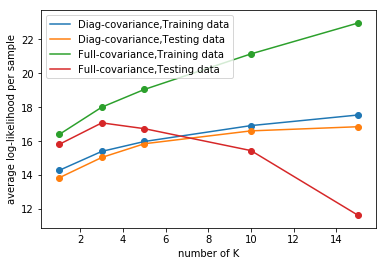

<Figure size 1440x1440 with 0 Axes>

In [50]:
# 3.5 
plt.plot(K,diag_array_training,label="Diag-covariance,Training data")
plt.plot(K,diag_array_testing,label="Diag-covariance,Testing data")
plt.plot(K,full_array_training,label="Full-covariance,Training data")
plt.plot(K,full_array_testing,label="Full-covariance,Testing data")
plt.scatter(K,diag_array_training)
plt.scatter(K,diag_array_testing)
plt.scatter(K,full_array_training)
plt.scatter(K,full_array_testing)
plt.legend()
plt.xlabel("number of K")
plt.ylabel("average log-likelihood per sample")
plt.figure(figsize=(20,20))   